# Analisis de prediccion de clasificacion.
Hasta al momento que hemos mostrado algoritmos (pocos) de clasificacion pero no hemos mostrado herramientas que nos llevan a concluir si los resultados son buenos o no. O mejor, si el metodo es bueno o no.

Necesitamos unas metricas que nos digan esto. Para esto pensemos en varios puntos.

* Una cosa es la etiqueta (lo real) y otro lo que arroje la predeccion. Si se tienen $K$ clases, entonces se puede construir una matriz de $K \times K$ donde la fila indica la etiqueta y la columna la prediccion.  A esta matriz se le conoce como la
[La matriz de confucion](https://stats.stackexchange.com/questions/164910/what-is-the-origin-of-the-term-confusion-matrix).




* El caso mas simple es para $K=2$ y tenemos una matriz que

Vamos a ver un ejemplo especifico.




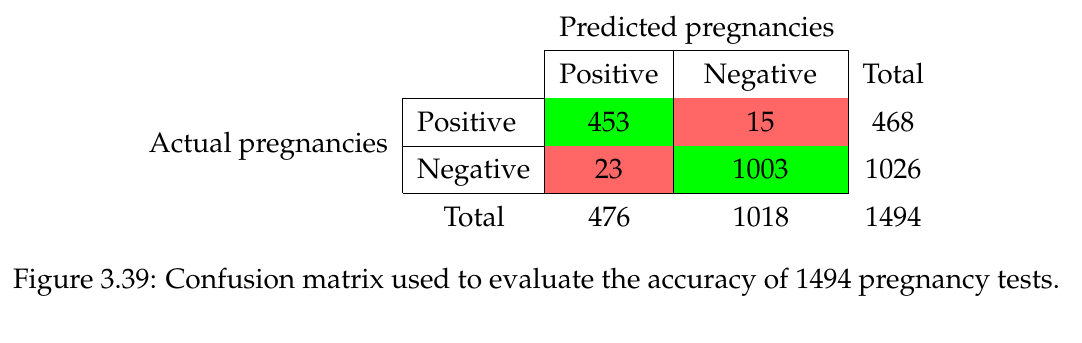

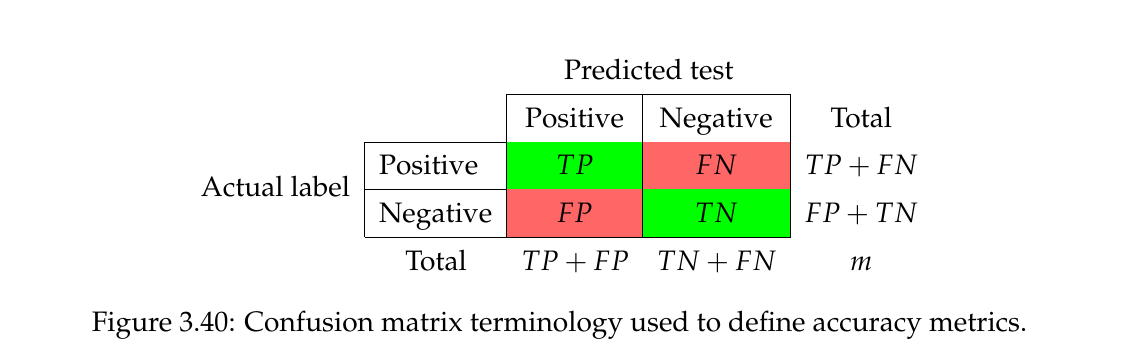

### Explicacion de la matriz de confusion en la Figura 3.40
Se tienen $m$ elementos (datos) en total.

La matriz de confusion para un caso de clasificacion binario es de $2x2$.  La notacion que usaremos en este curso es la siguiente.
Llamemos a esta matriz $\ell$.

* $\ell_{11}$= TP : True positives (verdaderos positivos).
Esto significa que la etiqueta es positiva y el resultado de la prediccion es positivo.

* $\ell_{12}$ = FN: False negatives,significa que la prediccion es falsa, la prediccion es negativos ( y son positivos)

* $\ell_{21}$ = FP: False postives (falsos positivos). Se predice positivo pero es mentiras (falso)

* $\ell_{22}$ = TN: True negatives (verdaderos negativos). Se predice que es negativo y la prediccion es correcta.

$m = TP + TN + FP + FN$.

La primera medida, antes de discutir lo que comenta Daren, es
El "accuracy" mide el radio entre la traza de la matriz y $m$.

$$\text{accuracy} =  \frac{TP + TN}{m} .$$
(accuracy lo traduzco como exactitud).


Lo opuesto a esto es "missclasification rate" es decir

$$\text{missclasification rate}= \frac{FP + FN}{m} .$$
claramente  accuracy+missclassifiction rate = 1.


Generar la matriz de confusion puede ser a veces molesta, pero
Python tiene formas de hacerlo mas automatico.
Tomemos un ejemplo usando `sklearn`.




In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

confusion_matrix(y_true, y_pred)  # tn, fp     y fn,pn

array([[3, 3],
       [2, 4]])

In [ ]:
tn , fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f" tn={tn}, fp={fp}, fn={fn}, tp={tp}")

 tn=3, fp=3, fn=2, tp=4


### Discusion sobre la matriz de confusion.

Ejemplo 1.0
* Un institudo de investigacion hace pruebas **deteccion de diabetes**.

    * (TP) True Positive : Prediccion es + y el paciente es diabetico, esto es bueno para la prueba, aunque no muy buenas noticias para el paciente.

    * (TN) : La prediccion es (-) (aliviado) y el paciente en verdad esta aliviado. Es lo mejor para el paciente.

    * (PF): La prediccion es enfermo pero el paciente esta aliviado. Es malo, el paciente sale aburrido, se cuida en exeso sin necesitad. No es lo peor pero es malo.

    * (FN):  La prediccion es - (aliviado) pero esta enfermo. Por que es lo peor. Por que paciente no se cuida (come azucar) y la enfermedad progresa. Caso peor puede ser la prediccion de cancer.  Se genera el riesgo de matastasis.


Ejemplo 2.0
Asuma un algoritmo de ML detecta si un **email es spam** o no.
Tenemos los siguientes casos.

    * (TP): El email que se predijo es spam y en verdad lo era. Bueno
    * (TN): El email se predice como legitimo (no spam) y en verdad no era spam. Tambien esta bien.
    * (FP): Falso positivo. El email se predice como spam pero no es spam. Usted esta en una companhia y el cliente #1 le manda un email para reunirsen en la tarde. El filtro de spam, lo manda al spam. La reunion no se da y se pierden millones de dolares.  Lo despiden del trabajo.......
    * (FN): El email se predice como bueno pero era spam. No se borra. Usted mismo lo borra. Los sistemas de spam le permiten a usuario calificarlo como "spam". El aprende.


Ejemplo 3.0
Este caso es bien interesante, aca $m=1$. A usted lo llaman y le dicen que se gano la loteria pero para reclamar el premio debe dar sus datos bancarios.


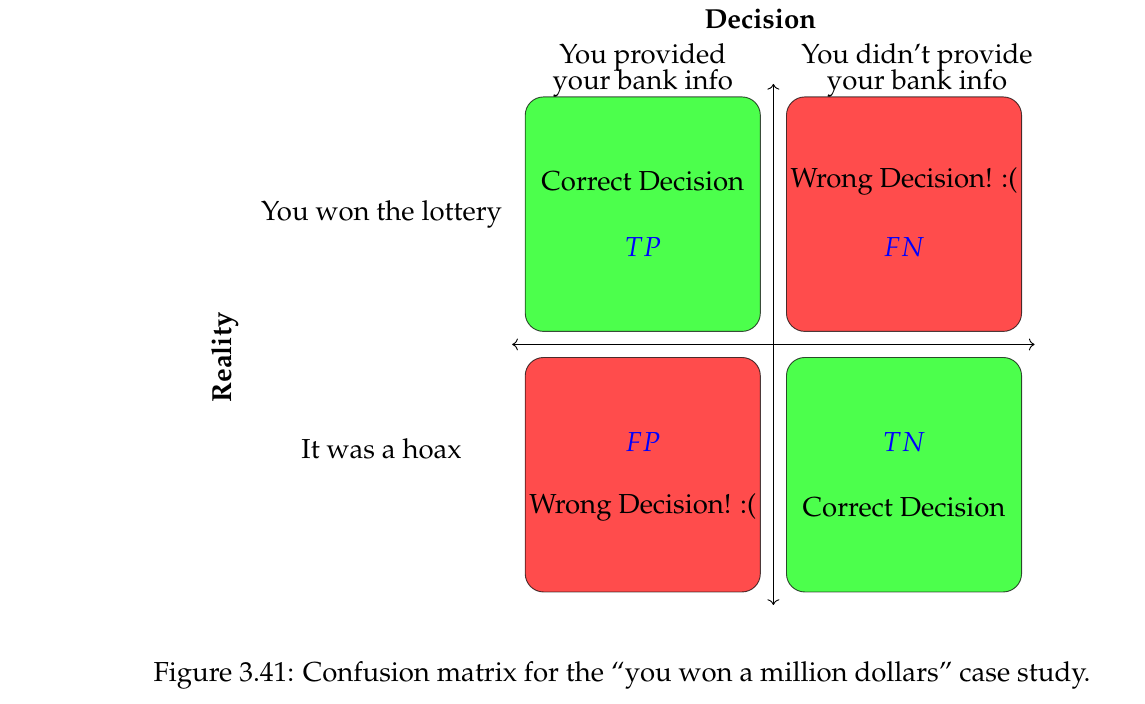











## Mas metricas.
Vamos a pensar en el problema de spam email

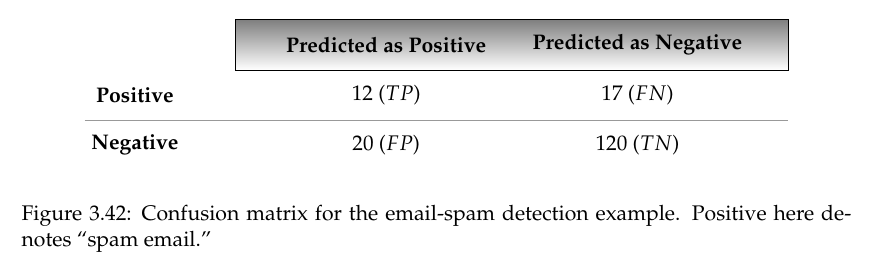


El "accuracy" para este caso esta dado por

$$ \text{accuracy} = \frac{12 + 120}{12 + 120 + 17 + 20}= 0.781
 \quad (78.1 \%) .$$

El siguiente ejemplo muestra como esta medida pueder enganhosa.

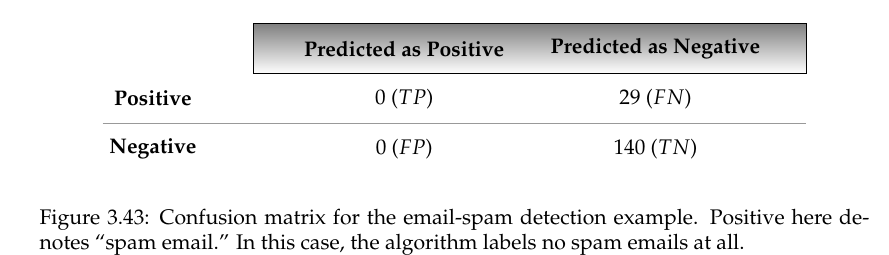

En este ejemplo vamos a asumir que la maquina (servidor de email) predice que todos son negativos, o sea que todos los mensajes son buenos y los dejar. Mejor dicho, "no sirve para nada"

Hallemos el "accuracy" en este caso.

$$\text{accuracy} = \frac{140 + 0}{169} = 0.828 \quad , (82.8\%) .$$

Introducimos una nueva metrica que se llama **precision**.
Esta metrica es el radio entre los verdaderamente positivos contra todos los positios (veraderamente y falsamente)


$$\text{precision} = \frac{TP}{TP + FP} .$$

Veamos esta metrica funcionando en el ejemplo que creamos.

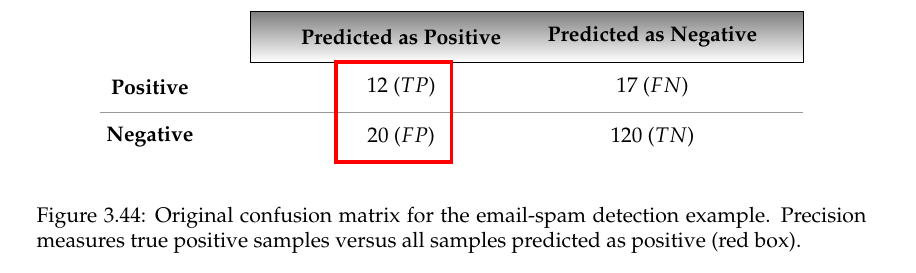

En este caso la precision es

$$\text{precision} = \frac{12}{12+20} = 0.375 \quad (37.5 \%)$$

El caso de los 0 de arriba que es un lio. Seria 0/0 que es indefinido, pero normalente, en la practica no dividimos por 0 sino que sumamos un valor pequenho en denominador, y obtendriamos que el servidor de mensajeria que no sirve para nada nos da un a precision de 0.

Otra metrica es pensar en los verdaderamente positivos contra los que son realmente positivos (TP+FN).

$$\text{recall} = \frac{TP}{TP+ FN}. $$



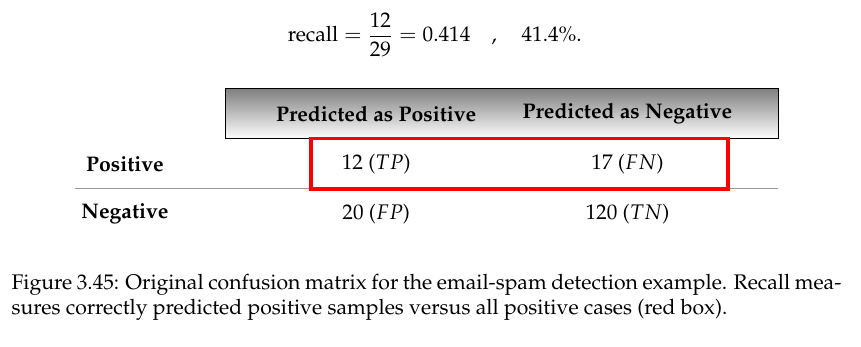

### Disussion corta sobre las metricas que hasta el momento llevamos.

* **recall* tiene otros nombres. Sensitivity (sensibilidad),
TPR (True Positive Rate)

* Si los falsos son 0, todas las medidas dan 1. Si
$FN=FP=0$, entonces accuracy=precision=recall=1.

* Si comparamos precision contra recall


$$ \text{precision} = \frac{TP}{TP + FP} \quad , \quad \text{recall} =
\frac{TP}{TP + FN}.$$

Vemos que son practicamente iguales, excepto por que en denominador la primera tiene $FP$ y la segunda tiene $FN$.
Son precisamente estos dos terminos los que hacen que un diagnostico de diabetes difiera en consecuencias para el usuario contra un diagnostico de spam email.

* Asi como existe TPR, tambien hay FPR (false positive rate). Los Falsos positivos contra todo lo negativo (FP + TN)

$$\text{FPR} = \frac{FP}{FP + TN} .$$


* Dado que precision y recall tienen un trade off. Entre mas FP menos FN, entre mas FN menos FP. Si ambos estan bien balanceados (en el medio), cualquiera de las dos medidas es buena. Las dos medidas son practicamente iguales. La pregunta es, que pasa si hay un gran desbalanceo entre FN, FP. Se crea una medida que es un promedio (armonico) como sigue

$$F1 \text{    Score}: \left ( \frac{\frac{1}{\text{precision}}+ \frac{1}{\text{recall}}}{2}    \right )^{-1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} .$$


La pregunta es, habiendo tantos promedios por que se elije el promedio armonico entre precision y recall. En la proxima clase





## Proxima clase
* Discusion del F1 score
* AUC-ROC (otras dos metricas mas)
* Matriz de confusion para $K>2$ (mas de dos clases)
* Si rinde, comenzamos con ANN: Artificial Neural Networks.